### Import libraries

In [3]:
# Basic Libraries

import numpy                          as np  # Math Library
import pandas                         as pd  # data processing
import seaborn                        as sns # data visualization
import matplotlib.pyplot              as plt # plotting library
import string
import re                                    # Regular Expression
import nltk                                  # Natural Language tool kit

from nltk.corpus                      import stopwords
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.model_selection          import train_test_split
from sklearn.naive_bayes              import MultinomialNB
from sklearn.metrics                  import classification_report, confusion_matrix

**Load the data**

In [4]:
# Load the data
tweets_df = pd.read_csv("/content/twitter(in).csv")

### Data Exploration

In [5]:
tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

<Axes: >

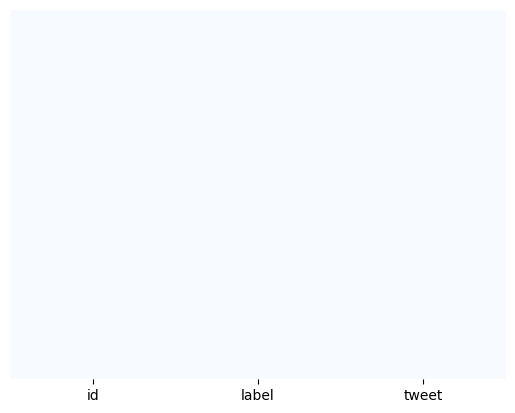

In [8]:
# plot missing values 'null'
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'Length'}>]], dtype=object)

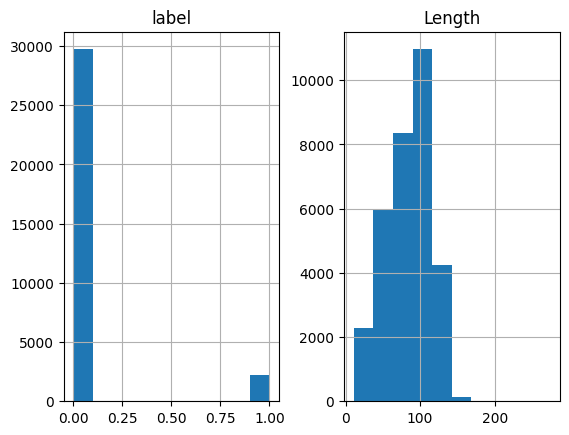

In [12]:
# plot the distribution of the target (run after drop 'id' column )
tweets_df.hist()

In [13]:
# view the message with mean length
tweets_df[tweets_df['Length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

(array([1.500e+01, 8.800e+01, 8.600e+01, 2.020e+02, 2.460e+02, 1.770e+02,
        3.440e+02, 3.780e+02, 2.850e+02, 4.500e+02, 2.890e+02, 5.030e+02,
        6.710e+02, 4.670e+02, 8.800e+02, 6.950e+02, 4.550e+02, 7.190e+02,
        4.850e+02, 7.940e+02, 8.790e+02, 5.270e+02, 8.190e+02, 7.720e+02,
        5.040e+02, 8.110e+02, 9.300e+02, 6.440e+02, 1.552e+03, 9.310e+02,
        1.379e+03, 1.477e+03, 7.700e+02, 1.155e+03, 1.028e+03, 8.070e+02,
        1.272e+03, 1.231e+03, 1.037e+03, 8.050e+02, 4.580e+02, 6.270e+02,
        5.950e+02, 4.030e+02, 5.600e+02, 3.560e+02, 5.330e+02, 5.040e+02,
        1.050e+02, 1.130e+02, 5.400e+01, 1.400e+01, 2.500e+01, 1.900e+01,
        6.000e+00, 5.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

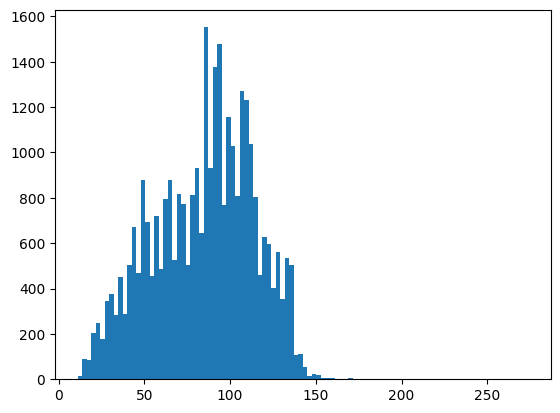

In [14]:
# plot the distribution of the Length
plt.hist(tweets_df['Length'],bins= 100)

### Data Preperation - preprocessing

In [9]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

In [10]:
tweets_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [11]:
# Add Length column to the dataframe
tweets_df['Length'] = tweets_df['tweet'].apply(len)

tweets_df

label                                              tweet  Length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

In [15]:
tweets_df.describe()

label        Length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [16]:
# view the shortest tweet
tweets_df[tweets_df['Length'] == 11]['tweet']

25195    i love you 
Name: tweet, dtype: object

In [17]:
# Split the positive tweets
positive_tweets = tweets_df[tweets_df['label'] == 0]
positive_tweets

label                                              tweet  Length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [18]:
# Split the negative tweets
negative_tweets = tweets_df[tweets_df['label'] == 1]
negative_tweets

label                                              tweet  Length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [19]:
# Combine the positive tweets in one big sentence
sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [20]:
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

**Some exploratory plot to get some insight**

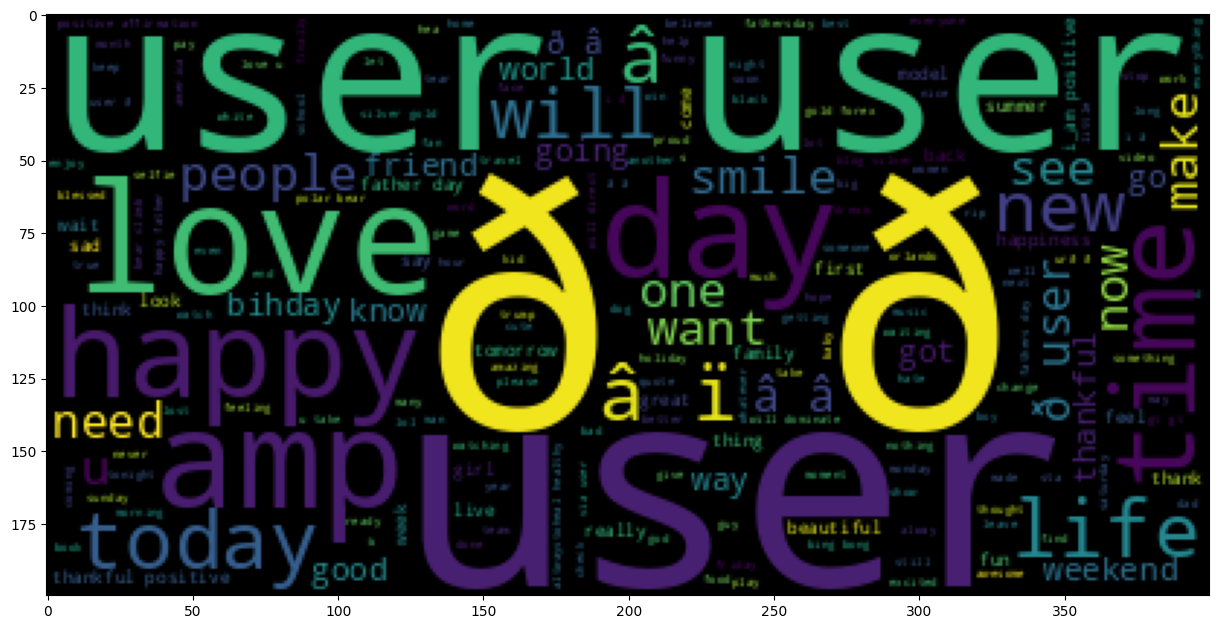

In [21]:
# visualizing the most frequent words using wordcloud

!pip install wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(15,12))
plt.imshow(WordCloud().generate(sentences_as_one_string))

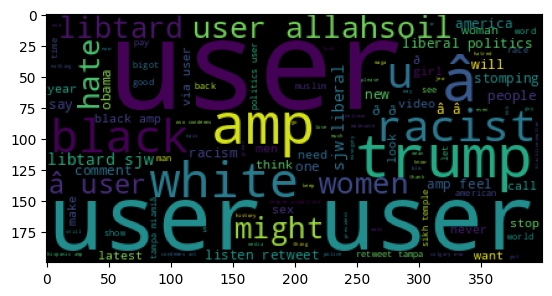

In [22]:
# plot the the most frequent words in the negative tweets
negative = negative_tweets['tweet'].tolist()
negative_as_one_string =" ".join(negative)

plt.imshow(WordCloud().generate(negative_as_one_string))

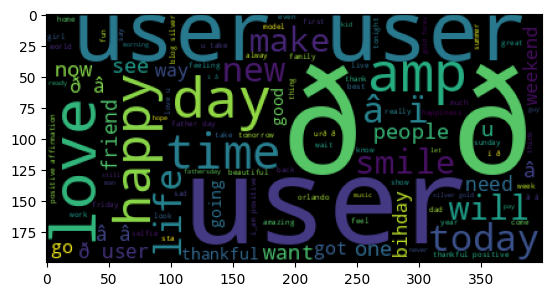

In [23]:
# plot the the most frequent words in the positive tweets
positive = positive_tweets['tweet'].tolist()
positive_as_one_string =" ".join(positive)

plt.imshow(WordCloud().generate(positive_as_one_string))

### Data cleaning
  - Remove Punctuation from Text.
  - Remove Stopwords from Text.

In [24]:
# Original data
print(tweets_df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [25]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [26]:
# Create function to Remove Punctuation from Text, Remove Stopwords from Text.
nltk.download('stopwords')

def message_cleaning(message):
    # Remove all punctuation
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    # Remove stopwords
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Cleaned
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [28]:
test_df = pd.DataFrame(tweets_df_clean)
test_df

tweet
0      [user, father, dysfunctional, selfish, drags, ...
1      [user, user, thanks, lyft, credit, cant, use, ...
2                                      [bihday, majesty]
3      [model, love, u, take, u, time, urð±, ðð...
4                      [factsguide, society, motivation]
...                                                  ...
31957  [ate, user, isz, youuuðððððð...
31958  [see, nina, turner, airwaves, trying, wrap, ma...
31959  [listening, sad, songs, monday, morning, otw, ...
31960  [user, sikh, temple, vandalised, calgary, wso,...
31961                              [thank, user, follow]

[31962 rows x 1 columns]

### Feature Engineering
- Count Vectorization (Tokenization).
- Split the data into train and test.

In [29]:
# Define the Vectorizer and crucial for preprocessing and cleaning the data before it's converted into a numerical format with the parameter 'analyzer = message_cleaning'
# 'dtype = np.uint8' ensuring that the elements in your matrix stored as integers within the range of 0 to 255 helps optimize memory usage.

vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [30]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
# Shap of my data raw, columns
tweets_countvectorizer.shape

(31962, 47386)

In [32]:
# Split the data features and target

X = pd.DataFrame(tweets_countvectorizer.toarray())
y = tweets_df['label']

In [33]:
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [34]:
# Split the data training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model selection and training

In [35]:
# Training Naive bayes classifier model

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

### Evaluate the model performance

<Axes: >

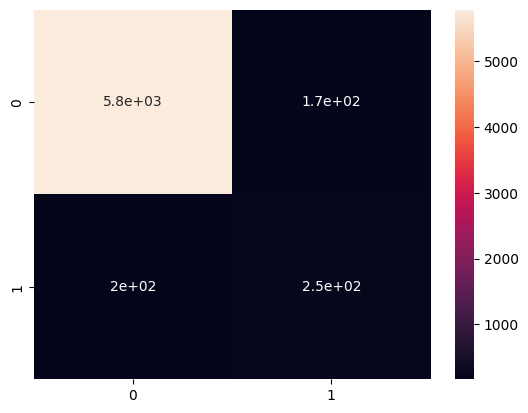

In [36]:
# Testing the model using confusion matrix

y_predict_test = naive_bayes_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [37]:
# Evaluate the model with classification report

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5948
           1       0.60      0.56      0.58       445

    accuracy                           0.94      6393
   macro avg       0.78      0.77      0.77      6393
weighted avg       0.94      0.94      0.94      6393

